In [18]:
#필요 모듈 호출
import numpy as np #행렬 연산 패키지
from scipy import stats #과학 계산 패키지
import scipy.stats #통계 분석 패키지
import pandas as pd #데이터 패키지
import statsmodels.api as sm #통계 분석 패키지
import matplotlib.pyplot as plt #데이터 시각화 패키지
import seaborn as sns #데이터 시각화 패키지
from statsmodels.stats.proportion import proportions_ztest
import matplotlib

#주피터 노트북 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
#한글 폰트 (맑은 고딕) 적용
matplotlib.rc('font',family='Malgun Gothic')

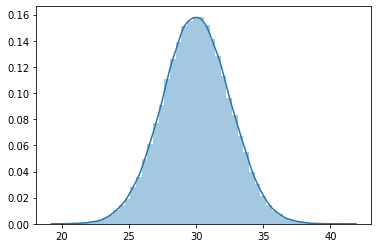

In [22]:
#p.41 [실습] 정규분포 그리기
normal2 = np.random.normal(30,2.5,100000)
sns.distplot(normal2)

#데이터 수를 10만개, 평균을 30, 표준 편차를 2.5로 잡은 정규분포이다
#정규 분포는 가운데(평균)을 기준으로 양옆으로 동일하다는 것을 인식하게 되었다.

In [23]:
#p.45 [실습] 정규분포 확률계산
mu = 175
sigma = 5
x = 180
prob = stats.norm.cdf(x, mu, sigma)
print("나의 키가 {0}cm 이상일 경우에 나는 {1:.1f}%범위에 위치".format(x,(1-prob)*100))

#평균이 175, 표준편차가 5인 정규분포에서 180cm에 해당하는 부분의 오른쪽 넓이가 답이다.
#정규분포를 이용하면, 편리하게 넓이를 구해낼 수 있음을 알게되었다.

나의 키가 180cm 이상일 경우에 나는 15.9%범위에 위치


In [24]:
#p.47 [실습] 정규분포 확률계산 -1
mu = 12
sigma = 3
x = 15
x1 = 9
prob = stats.norm.cdf(x, mu, sigma)
prob1 = stats.norm.cdf(x1, mu, sigma)
print("{0}km 이상 {1}km 이하를 달릴 확률은:{2:.1f}%에 해당함".format(x1,x,(prob-prob1)*100))

#평균이 12, 표준편차가 3인 정규 분포에서 9부터 12에 해당하는 넓이가 답이다.
#구하고자 하는 오른쪽 끝 부분의 넓이에서 왼쪽 끝 부분의 넓이를 제거하면 가운데 값을 얻어낼 수 있음을 알게되었다.

9km 이상 15km 이하를 달릴 확률은:68.3%에 해당함


In [25]:
#47 [실습] 정규분포 확률계산 -2
mu = 12
sigma = 3
x = 15
prob = stats.norm.cdf(x, mu, sigma)
print("{0}km 이상을 달릴 확률은:{1:.1f}%에 해당함".format(x,(1-prob)*100))

#평균이 12, 표준편차가 3인 정규 분포에서 15에서 끝부분에 해당하는 넓이가 답이다.
#구하고자 하는 오른쪽 끝 부분의 넓이를 구하고 전체 넓이(1)에서 빼면 오른쪽 끝에 위치한 값을 얻어낼 수 있음을 알게되었다

15km 이상을 달릴 확률은:15.9%에 해당함


array([ 0.471, -1.191,  1.433, ...,  0.029, -1.221,  0.384])

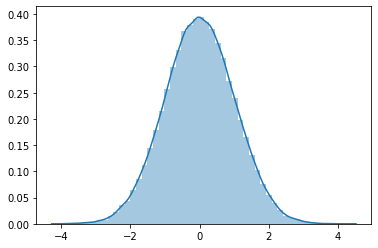

In [26]:
#p.54 [실습] 표준정규분포 그리기
#seed 서택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(1234)
#평균: 0, 표준편차:1, 데이터 수: 100,000의 정규분포를 따르는 데이터 생성
normal = np.random.normal(0,1,100000)
#histogram
sns.distplot(normal)

#데이터 확인, 소수점3
normal.round(3)

#평균이 0, 표준편차가 1, 데이터 수가 10만개인 정규분포표이다.
#정규 분포는 가운데(평균)을 기준으로 양옆으로 동일하다는 것을 인식하게 되었다.

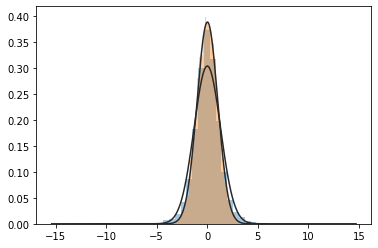

In [32]:
#p.58 [실습] t분포
np.random.seed(1234)
t_df5 = np.random.standard_t(df=5, size=10000)
t_df50 = np.random.standard_t(df=50, size=10000)
sns.distplot(t_df5,fit=stats.norm,kde=False)
sns.distplot(t_df50,fit=stats.norm,kde=False)

#자유도가 각각 5와 10이며, 데이터 개수가 만개인 t분포이다.
#자유도가 커질 수록, 그래프의 폭이 더 좁아지는 것을 알게되었다.

In [9]:
#p.60 [실습] t분포
t = 2.0
df = 100
prob=stats.t.cdf(t,df)
print("P(T<=):{:.3f}".format(prob))

#기존 t분포 값을 구하기 위해서는 t분포표에서 자유도와 t값을 고려한 값 산출이 필요하였다.
#파이썬을 이용하니 결과를 구하는 시간이 큰 폭으로 줄어들었다.

P(T<=):0.976


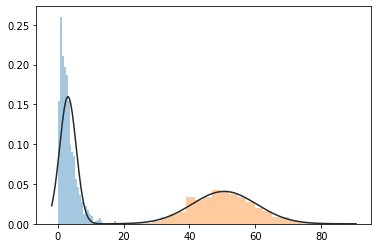

In [33]:
#p.64 [실습] 카이제곱 분포
np.random.seed(seed=1234)
chisq_df3 = np.random.chisquare(df = 3, size = 1000)
chisq_df50 = np.random.chisquare(df = 50, size = 1000)
sns.distplot(chisq_df3,fit=stats.norm,kde=False)
sns.distplot(chisq_df50,fit=stats.norm,kde=False)

#자유도가 각각 3과 50이며 데이터가 천개인 카이제곱 분포이다.
#자유도가 올라 갈수록, 카이제곱 분포가 정규분포의 형태와 가까워짐을 알 수 있었다.

In [11]:
#p.66 [실습] 카이제곱 분포
chisq = 3.0
df = 8
prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}):{1:.4f}".format(chisq,prob))

#기존 카이제곱 분포 값을 구하기 위해서는 카이스퀘어표에서 자유도와 x^2값을 고려한 값 산출이 필요하였다.
#파이썬을 이용하니 결과를 구하는 시간이 큰 폭으로 줄어들었다.

P(X<=3.0):0.0656


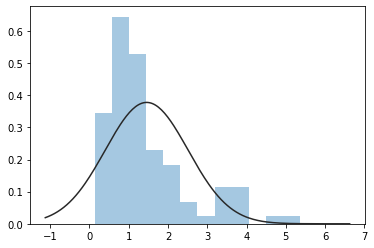

In [36]:
#p.71 [실습] F-분포-1
np.random.seed(seed=1234)
F_df10_10 = np.random.f(dfnum=10, dfden=10, size=100)
sns.distplot(F_df10_10, fit = stats.norm, kde = False)

#분자 자유도10, 분모 자유도10, 데이터 백개로 구성된 F분포이다.
#분자 혹은 분모의 자유도가 증가하면, 정규분표 형태와 가까워 질 것이라고 예측되었다.

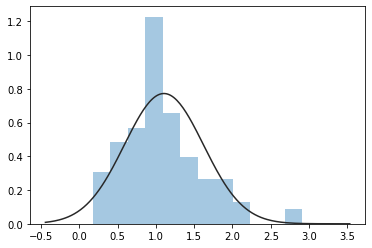

In [37]:
#p.71 [실습] F-분포-2
np.random.seed(seed=1234)
F_df10_50 = np.random.f(dfnum=10, dfden=50, size=100)
sns.distplot(F_df10_50, fit = stats.norm, kde = False)

#분자 자유도10, 분모 자유도50, 데이터 백개로 구성된 F분포이다.
#실제로, 분모의 자유도가 증가하여, 기존보다 정규분표 형태에 가까워졌다.
#이로서, 자유도이 상승이 곧 정규분포 형태로의 전환이라는 사실을 인식하게 되었다.

In [14]:
#p.73 [실습] F-분포
f = 1.5
dfnum = 10
dfden = 100

prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X<=):{:.2f}".format(prob))

#기존 F-분포 값을 구하기 위해서는 F분포표에서 두개의 자유도와 F값을 고려하여 값 산출이 필요하였다.
#파이썬을 이용하니 결과를 구하는 시간이 큰 폭으로 줄어들었다.
#종형의 대칭분포가 아니다.

P(X<=):0.85


In [15]:
#p.77 [실습] Weibull분포
x = 2500
alpha = 5.2
beta = 2200
prob = stats.weibull_min.cdf(x,alpha,scale = beta)
print("P(X<=x):{:.3f}".format(1-prob))

#신뢰성 문제에 적용되는 분포이다.
#x와 형상모수, 척도모수를 전부 고려해야하므로 상당히 복잡한 분포이다.
#이상 작동해야 하므로, 오른쪽에 있는 넓이를 구해야하므로 전체에서 나머지 부분을 빼주었다.

P(X<=x):0.143


In [16]:
#p.84 [실습] 이항분포
n = 5
for i in range(n+1):
    prob = stats.binom.pmf(k = i, n = n, p = 0.3)
    print("P(X={0})={1:.3f}".format(i, prob))
    
#특정한 횟수의 성공을 알고자 할때 사용하는 분포이다.
#5대의 차량을 선택해야 하므로, n에 5를주고, 불량 대수는 0대부터 5대까지 나올 수 있으므로 range에는 n+1을준다.
#확률p(0.3)에 의거하여 불량대수 x가 나올 확률을 구한다.
#불량대수 확률이 30%이므로, 상식적으로 생각했을때 1대가 나오는 것이 이상적이다.

P(X=0)=0.168
P(X=1)=0.360
P(X=2)=0.309
P(X=3)=0.132
P(X=4)=0.028
P(X=5)=0.002


In [27]:
#p.87 [실습] 포아송분포
mu = 3
prob_1 = stats.poisson.pmf(2,mu)
prob_2 = stats.poisson.cdf(1,mu)
prob_3 = stats.poisson.cdf(3,mu)
print("{0}명의 손님이 도착할 확률:{1:.1f}".format(2,prob_1*100))
print("{0}명 이하의 손님이 도착할 확률:{1:.1f}".format(1,prob_2*100))
print("{0}명 이상의 손님이 도착할 확률:{1:.1f}".format(3,(1-prob_3)*100))

#일정 단위에서 발생한 성공 횟수를 알기 위해 사용하는 분포이다.
#평균 1시간에 3명씩 손님이 도착한다. 따라서, 10시에서 11시 사이라는 조건은 큰 의미가 없다.
#즉, 10시부터 11시 사이와 12시와 13시 사이에 발생할 사건의 확률이 동일하다는 의미이다.
#평균 한시간에 3명의 손님이 오므로, mu에 3을 주었다.
#2명의 손님이 도착해야 하므로 prob_1의 인자에 2를 주었다.
#1명 이하의 손님이 도착해야 하므로 prob_2의 인자에 1을 주었다.
#3명 이상의 손님이 도착해야하므로 prob_3의 인자에 3을 주고, 그것을 1에서 빼었다.
#1에서 prob_3을 빼준 이유는, prob_3은 3명 이하의 손님이 도착할 확률이기 때문이다.

2명의 손님이 도착할 확률:22.4
1명 이하의 손님이 도착할 확률:19.9
3명 이상의 손님이 도착할 확률:35.3
